In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass,set_env_joint_configuration,get_env_joint_names,print_env_joint_infos
from pid import PID_ControllerClass
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Done.
Ready.


### Parsing `UR5e`

In [2]:
env = MuJoCoParserClass(name='UR5e',xml_path='../asset/ur5e/UR5_rg2_gripper.xml')
print ("[%s] parsed."%(env.name))

[UR5e] parsed.


### Get / Set `Configuration`

In [3]:
import math

init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]

joint_names = get_env_joint_names(env,prefix='ur_') # available objects
print(joint_names)
print()
set_env_joint_configuration(env, init_configurations, prefix='ur_')
print_env_joint_infos(env, prefix='ur_')


['ur_shoulder_pan_joint', 'ur_shoulder_lift_joint', 'ur_elbow_joint', 'ur_wrist_1_joint', 'ur_wrist_2_joint', 'ur_wrist_3_joint']

[0/6] joint_name:[ur_shoulder_pan_joint]
[0/6] joint_configurations:[-1.571]
[1/6] joint_name:[ur_shoulder_lift_joint]
[1/6] joint_configurations:[-2.356]
[2/6] joint_name:[ur_elbow_joint]
[2/6] joint_configurations:[2.356]
[3/6] joint_name:[ur_wrist_1_joint]
[3/6] joint_configurations:[1.571]
[4/6] joint_name:[ur_wrist_2_joint]
[4/6] joint_configurations:[0.785]
[5/6] joint_name:[ur_wrist_3_joint]
[5/6] joint_configurations:[-1.571]


### Get camera informations

In [4]:
cam_infos = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 0.0,
                    cam_elevation = -90.0,
                    cam_lookat    = [1.4,0.0,4.0])
cam_infos

{'cam_distance': 0.0,
 'cam_azimuth': 0.0,
 'cam_elevation': -90.0,
 'cam_lookat': array([1.4, 0. , 4. ])}

[0/6] joint_name:[ur_shoulder_pan_joint]
[0/6] joint_configurations:[-1.571]
[1/6] joint_name:[ur_shoulder_lift_joint]
[1/6] joint_configurations:[-2.356]
[2/6] joint_name:[ur_elbow_joint]
[2/6] joint_configurations:[2.356]
[3/6] joint_name:[ur_wrist_1_joint]
[3/6] joint_configurations:[1.571]
[4/6] joint_name:[ur_wrist_2_joint]
[4/6] joint_configurations:[0.785]
[5/6] joint_name:[ur_wrist_3_joint]
[5/6] joint_configurations:[-1.571]


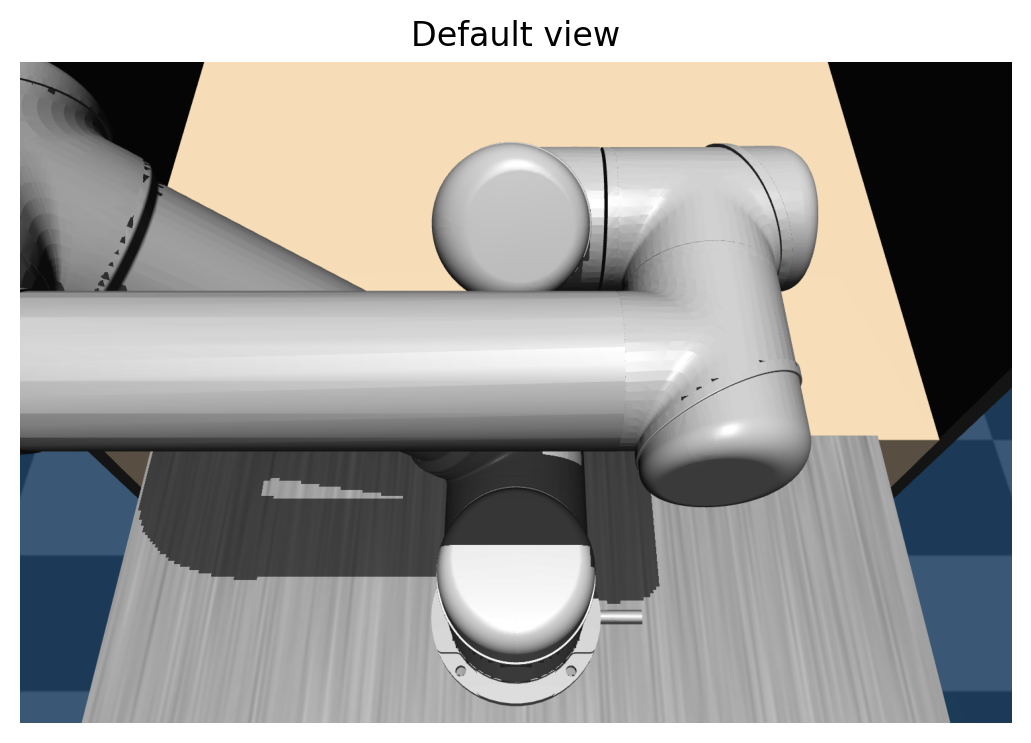

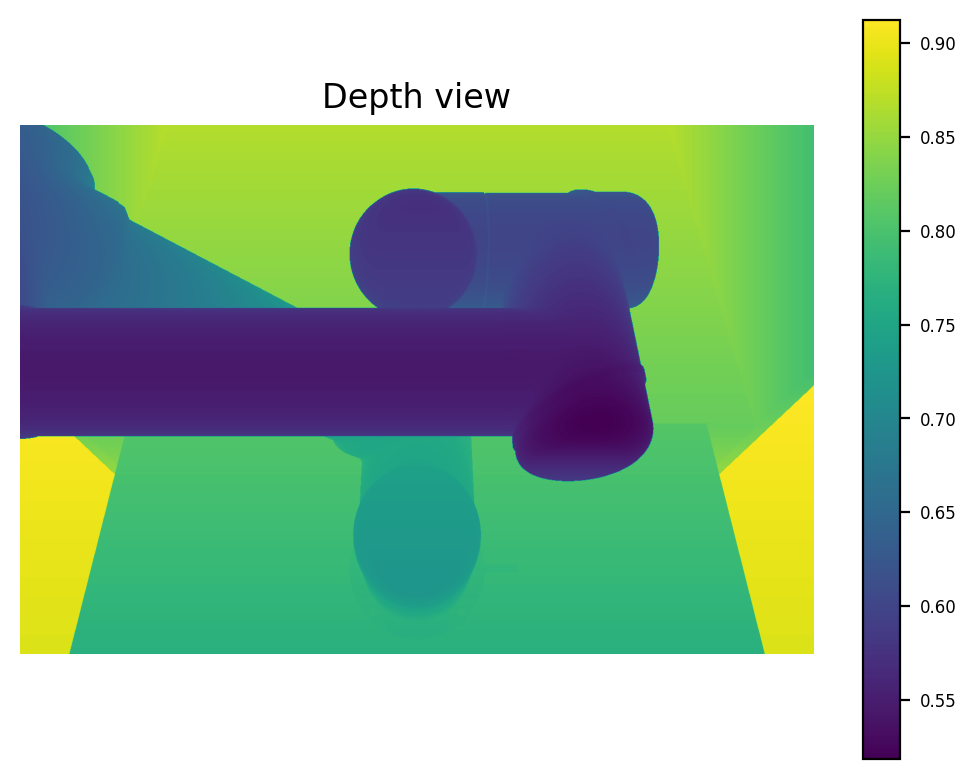

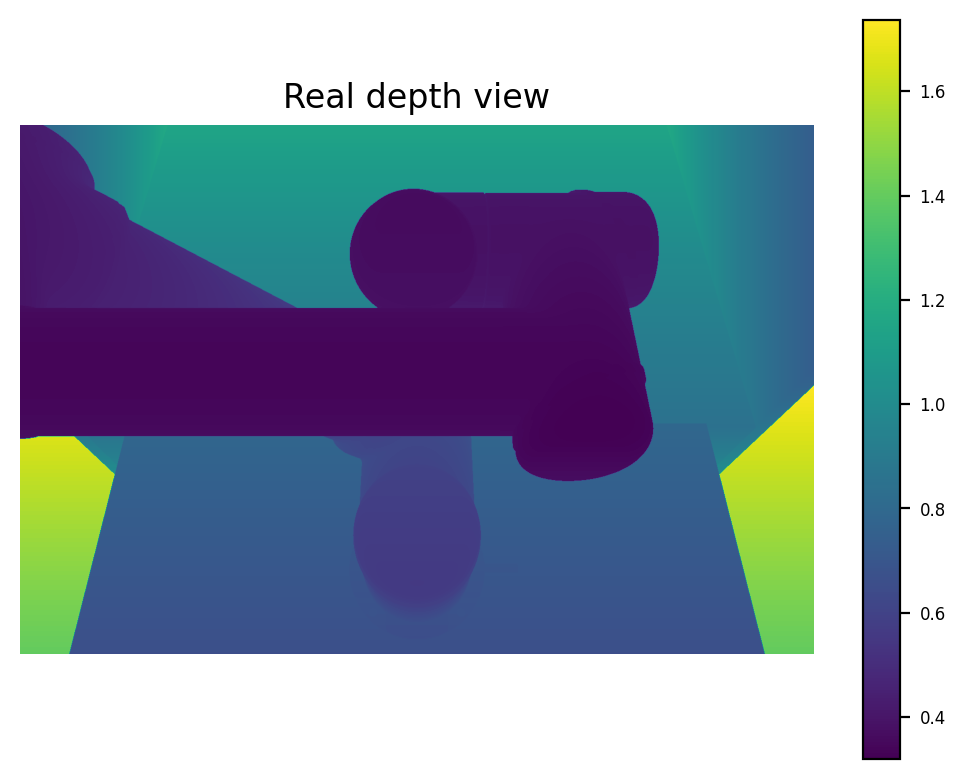

In [5]:
width = 1500
height = 1000


cam_infos = env.set_cam_infos(cam_distance  = 0.0,
                    cam_azimuth   = 0.0,
                    cam_elevation = -60.0,
                    cam_lookat    = [0.0,0.0,1.5])

init_configurations = [-math.pi/2, -3*math.pi/4, 3*math.pi/4, math.pi/2, math.pi/4, -math.pi/2 ]
set_env_joint_configuration(env, init_configurations, prefix='ur_')
print_env_joint_infos(env, prefix='ur_')

for _ in range(2):
    img = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=False, camera_name="track")
    img_depth = env.render_scene(mode='rgb_array', cam_infos=cam_infos, width=width, height=height, depth_toggle=True, camera_name="track")
    img_real = env.depth_2_meters(img_depth)

plt.imshow(img); plt.axis('off')
plt.title("Default view")
plt.show()

plt.imshow(img_depth); plt.axis('off')
plt.title("Depth view")
plt.colorbar()
plt.show()

plt.imshow(img_real); plt.axis('off')
plt.title("Real depth view")
plt.colorbar()
plt.show()

### etc

In [ ]:
t = 0

while True:
    # env.sim.data.ctrl[0] = math.cos(t / 10.) * 0.01
    # env.sim.data.ctrl[1] = math.sin(t / 10.) * 0.01
    res = env.sim.render(255, 255, camera_name="ee-follower")
    print(type(res), res.shape)
    env.sim.step()

    t += 1
    # viewer.render()
    if t > 10:
        break